In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
#warnings.filterwarnings('ignore')

In [92]:
raw_crime_data = pd.read_csv('Crimes_-_2022.csv')
raw_crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12589893,JF109865,01/11/2022 03:00:00 PM,087XX S KINGSTON AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,...,7.0,46,17,1194660.0,1847481.0,2022,09/14/2023 03:41:59 PM,41.736409,-87.562410,"(41.736409029, -87.562410309)"
1,12592454,JF113025,01/14/2022 03:55:00 PM,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,09/14/2023 03:41:59 PM,41.771782,-87.649437,"(41.771782439, -87.649436929)"
2,12785595,JF346553,08/05/2022 09:00:00 PM,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,09/14/2023 03:41:59 PM,41.763338,-87.597001,"(41.763337967, -87.597001131)"
3,12808281,JF373517,08/14/2022 02:00:00 PM,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,09/14/2023 03:41:59 PM,41.985875,-87.766404,"(41.985875279, -87.766403857)"
4,12888104,JF469015,11/10/2022 03:47:00 AM,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,09/14/2023 03:41:59 PM,41.762615,-87.652840,"(41.76261474, -87.652840463)"


## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Distribution of response
*By Sylvia Sherwood*

In [53]:
#...Plot for distribution of response...#

# Mean and standard deviation of response #

### Data cleaning
*By Sankaranarayanan Balasubramanian & Fiona Fe*

In [54]:
#...Code with comments...#

# Imputing missing values #

### Data preparation
*By Ryu Kimiko*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need are analyzing house price, we derived some new variables *(from existing variables)* that intuitively seem to be associated with house price. 

2. We have created a standardized version of the dataset, as we are computing Euclidean distances to find houses similar to a given house

In [55]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [56]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Analysis 1:  How do the types of crimes vary throughout the day (ie. public vs. private, violent vs. nonviolent, location)?
*By \<Alyssa Shou>*

In [93]:
raw_crime_data.shape

(239043, 22)

In [94]:
# converting the date column to datetime objects #
raw_crime_data['Date'] = crimes['Date'].apply(pd.to_datetime)
#raw_crime_data['Date'] = pd.to_datetime(crimes['Date'])
raw_crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12589893,JF109865,2022-01-11 15:00:00,087XX S KINGSTON AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,...,7.0,46,17,1194660.0,1847481.0,2022,09/14/2023 03:41:59 PM,41.736409,-87.562410,"(41.736409029, -87.562410309)"
1,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,09/14/2023 03:41:59 PM,41.771782,-87.649437,"(41.771782439, -87.649436929)"
2,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,09/14/2023 03:41:59 PM,41.763338,-87.597001,"(41.763337967, -87.597001131)"
3,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,09/14/2023 03:41:59 PM,41.985875,-87.766404,"(41.985875279, -87.766403857)"
4,12888104,JF469015,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,09/14/2023 03:41:59 PM,41.762615,-87.652840,"(41.76261474, -87.652840463)"


In [98]:
#checking for null values in columns that are relevant for my analysis
raw_crime_data.isnull().sum(axis = 0)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     881
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4107
Y Coordinate            4107
Year                       0
Updated On                 0
Latitude                4107
Longitude               4107
Location                4107
dtype: int64

In [97]:
# for my specific analysis: drop the NA values for location Description
crimes_cleaned = raw_crime_data.dropna(subset = ['Location Description'])
crimes_cleaned.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12589893,JF109865,2022-01-11 15:00:00,087XX S KINGSTON AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,...,7.0,46,17,1194660.0,1847481.0,2022,09/14/2023 03:41:59 PM,41.736409,-87.562410,"(41.736409029, -87.562410309)"
1,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,09/14/2023 03:41:59 PM,41.771782,-87.649437,"(41.771782439, -87.649436929)"
2,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,09/14/2023 03:41:59 PM,41.763338,-87.597001,"(41.763337967, -87.597001131)"
3,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,09/14/2023 03:41:59 PM,41.985875,-87.766404,"(41.985875279, -87.766403857)"
4,12888104,JF469015,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,09/14/2023 03:41:59 PM,41.762615,-87.652840,"(41.76261474, -87.652840463)"


In [99]:
#checking to make sure values were dropped
crimes_cleaned.isnull().sum(axis = 0)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       9
Community Area             0
FBI Code                   0
X Coordinate            3870
Y Coordinate            3870
Year                       0
Updated On                 0
Latitude                3870
Longitude               3870
Location                3870
dtype: int64

Graphing the number of crimes by hour as an initial starting point to determine analysis time frames

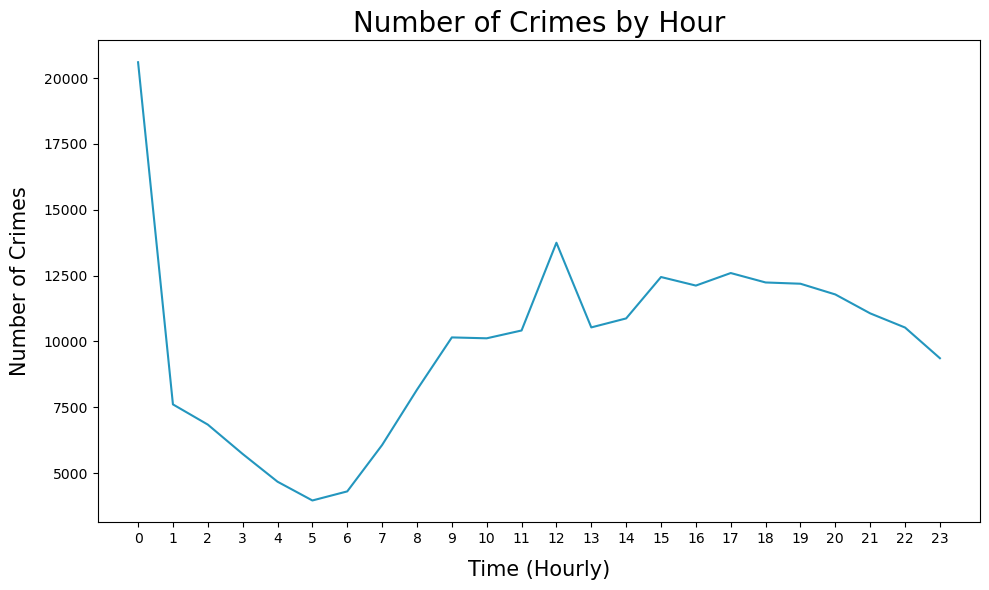

In [100]:
colors = ["#c77464", "#2396be", "#967aa0", "#ffc858", "#d8a2e7", "#89c388", "#e6a1c6", "#6c6bc9", "#82c1c4", "#D98C55"]

# Round times down to nearest hour
crimes_cleaned['hourly_time'] = crimes_cleaned['Date'].dt.floor('H').dt.time

crime_counts = crimes_cleaned['hourly_time'].value_counts().sort_index()
crime_counts = crime_counts.to_frame(name = 'Count').reset_index()

plt.figure(figsize=(10, 6))
bx = sns.lineplot(x= crime_counts.index, y=crime_counts.Count, color = "#2396be")
step = len(crime_counts.index) // 24 
plt.xticks(range(0, len(crime_counts.index), step))
plt.xlabel('Time (Hourly)', fontsize = 15, labelpad=10)
plt.ylabel('Number of Crimes', fontsize = 15, labelpad=10)
plt.title('Number of Crimes by Hour', fontsize = 20)
plt.tight_layout()
plt.show()

# grouping the data by time frames

**4 Time frames for analysis as follows:**

[6 am - 9 am) - morning rush hour

[12 pm - 1 pm) - day-time crime peak

[4 pm - 7 pm) - evening rush hour

[12 am - 1 am) - night-time crime peak

* the rush hour time frames are more-so for stakeholders who are current residents (especially workers who are commuting to/from and around the city
* the day-time and night-time crime peak time frames are more-so for visitors who are getting a general idea of crime characteristics by time

find the most common location descriptions

look at crime rates throughout the date (necessary even though probably obvious crimes are more rampant at night)

private vs. public crimes (looking at domestic violence if time but otherwise focusing on categorizing private/public crimes; private might mean the location descrpition is in an apartment/residence)

violent vs. nonviolent (battery, assault, homicide, armed)

## Morning Rush Hour

In [64]:
#slicing the data to only look at 6 am to 9 am
morning_rush = crimes_cleaned.loc[(crimes_cleaned['Date'].dt.hour >= 6) & (crimes_cleaned['Date'].dt.hour < 9)]
morning_rush.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time
13,12829768,JF398130,2022-09-16 07:00:00,030XX N WHIPPLE ST,0320,ROBBERY,STRONG ARM - NO WEAPON,APARTMENT,False,False,...,21,03,1155521.0,1919887.0,2022,09/15/2023 03:41:25 PM,41.935972,-87.703859,"(41.935972475, -87.703858758)",07:00:00
18,13211226,JF308371,2022-06-07 07:00:00,002XX S ASHLAND AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,GOVERNMENT BUILDING / PROPERTY,False,False,...,28,26,NaN,NaN,2022,09/15/2023 03:42:23 PM,NaN,NaN,NaN,07:00:00
28,12784904,JF345855,2022-07-31 07:00:00,021XX N SPRINGFIELD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,22,02,1150028.0,1914097.0,2022,09/16/2023 03:41:56 PM,41.920193,-87.724197,"(41.920193109, -87.724197302)",07:00:00
31,12931878,JF521379,2022-12-24 08:00:00,021XX S MARSHALL BLVD,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE - PORCH / HALLWAY,True,True,...,30,04B,1157031.0,1889686.0,2022,09/22/2023 03:41:26 PM,41.853068,-87.699130,"(41.853067647, -87.69912978)",08:00:00
39,13213753,JG427020,2022-01-01 06:00:00,014XX N SEDGWICK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,...,8,11,NaN,NaN,2022,09/18/2023 03:42:32 PM,NaN,NaN,NaN,06:00:00


### Morning Rush Crime Types

In [65]:
#top 10 types of crime from 6 am to 9 am
combination_mr = morning_rush.groupby(['Primary Type', 'Description']).size().reset_index(name='Count')
combination_mr = combination_mr.sort_values(by = 'Count', ascending = False).head(10)
combination_mr['Type'] = combination_mr['Primary Type'] + " " + combination_mr['Description']
combination_mr

,Primary Type,Description,Count,Type
205,THEFT,OVER $500,1710,THEFT OVER $500
201,THEFT,$500 AND UNDER,1601,THEFT $500 AND UNDER
36,BATTERY,DOMESTIC BATTERY SIMPLE,1576,BATTERY DOMESTIC BATTERY SIMPLE
103,MOTOR VEHICLE THEFT,AUTOMOBILE,1504,MOTOR VEHICLE THEFT AUTOMOBILE
52,CRIMINAL DAMAGE,TO VEHICLE,1312,CRIMINAL DAMAGE TO VEHICLE
16,ASSAULT,SIMPLE,1055,ASSAULT SIMPLE
50,CRIMINAL DAMAGE,TO PROPERTY,1022,CRIMINAL DAMAGE TO PROPERTY
39,BATTERY,SIMPLE,890,BATTERY SIMPLE
208,THEFT,RETAIL THEFT,692,THEFT RETAIL THEFT
41,BURGLARY,FORCIBLE ENTRY,396,BURGLARY FORCIBLE ENTRY


### Morning Rush Locations

In [66]:
mr_locations = morning_rush['Location Description'].value_counts().head(10)
locations_mr = mr_locations.to_frame(name = 'Count').reset_index()
locations_mr

,index,Count
0,STREET,4989
1,APARTMENT,3990
2,RESIDENCE,2448
3,PARKING LOT / GARAGE (NON RESIDENTIAL),765
4,SIDEWALK,714
5,SMALL RETAIL STORE,431
6,COMMERCIAL / BUSINESS OFFICE,305
7,ALLEY,301
8,OTHER (SPECIFY),290
9,RESIDENCE - GARAGE,283


### Morning Rush Violence

In [67]:
#importing data of Illinois IUCR codes that matches up with columns in our dataset
codes = pd.read_csv('IUCR Codes.csv')
codes.head()

,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE,ACTIVE
0,110,HOMICIDE,FIRST DEGREE MURDER,I,True
1,130,HOMICIDE,SECOND DEGREE MURDER,I,True
2,141,HOMICIDE,INVOLUNTARY MANSLAUGHTER,N,True
3,142,HOMICIDE,RECKLESS HOMICIDE,N,True
4,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,I,True


In [68]:
#IUCR <= 558 + codes 051A, 051B, 041A, 041B, 031A, 031B are considered violent

# Function to determine if a crime is violent based on IUCR code
def is_violent(iucr_code):
    # Define IUCR codes that indicate violent crimes
    violent_iucr = ['051A', '051B', '041A', '041B', '031A', '031B']
    
    # Check if the IUCR code match violent codes
    if iucr_code.isdigit():
        return int(iucr_code) <= 558
    else:
        return iucr_code in violent_iucr

# Apply the function to create the 'Violent?' column
morning_rush['Violent?'] = morning_rush['IUCR'].apply(lambda x: is_violent(x))
morning_rush.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time,Violent?
13,12829768,JF398130,2022-09-16 07:00:00,030XX N WHIPPLE ST,0320,ROBBERY,STRONG ARM - NO WEAPON,APARTMENT,False,False,...,03,1155521.0,1919887.0,2022,09/15/2023 03:41:25 PM,41.935972,-87.703859,"(41.935972475, -87.703858758)",07:00:00,True
18,13211226,JF308371,2022-06-07 07:00:00,002XX S ASHLAND AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,GOVERNMENT BUILDING / PROPERTY,False,False,...,26,NaN,NaN,2022,09/15/2023 03:42:23 PM,NaN,NaN,NaN,07:00:00,False
28,12784904,JF345855,2022-07-31 07:00:00,021XX N SPRINGFIELD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,02,1150028.0,1914097.0,2022,09/16/2023 03:41:56 PM,41.920193,-87.724197,"(41.920193109, -87.724197302)",07:00:00,False
31,12931878,JF521379,2022-12-24 08:00:00,021XX S MARSHALL BLVD,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE - PORCH / HALLWAY,True,True,...,04B,1157031.0,1889686.0,2022,09/22/2023 03:41:26 PM,41.853068,-87.699130,"(41.853067647, -87.69912978)",08:00:00,True
39,13213753,JG427020,2022-01-01 06:00:00,014XX N SEDGWICK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,...,11,NaN,NaN,2022,09/18/2023 03:42:32 PM,NaN,NaN,NaN,06:00:00,False


In [69]:
violent_crimes_percentage = (morning_rush['Violent?'].sum() / len(midnight)) * 100

print(f"The percentage of violent crimes is: {violent_crimes_percentage:.2f}%")

The percentage of violent crimes is: 21.32%


## Noon

In [70]:
noon = crimes_cleaned.loc[crimes_cleaned['Date'].dt.hour == 12]
noon.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time
15,12885646,JF465749,2022-11-05 12:49:00,044XX W RICE ST,0620,BURGLARY,UNLAWFUL ENTRY,WAREHOUSE,True,False,...,23,05,1146532.0,1905297.0,2022,09/15/2023 03:41:25 PM,41.896112,-87.737267,"(41.896112422, -87.737267038)",12:00:00
27,12767058,JF324850,2022-07-03 12:00:00,019XX N LOWELL AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,20,02,1147084.0,1912456.0,2022,09/16/2023 03:41:56 PM,41.915747,-87.735056,"(41.915746919, -87.735056247)",12:00:00
41,13184937,JG393538,2022-08-01 12:00:00,020XX W HOMER ST,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,True,...,22,10,NaN,NaN,2022,08/23/2023 03:41:55 PM,NaN,NaN,NaN,12:00:00
55,12792072,JF354522,2022-08-12 12:00:00,032XX N DAMEN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,5,05,1162437.0,1921720.0,2022,09/20/2023 03:41:26 PM,41.940860,-87.678390,"(41.940860174, -87.678390398)",12:00:00
57,12616294,JF142268,2022-02-12 12:46:00,054XX S LOOMIS BLVD,031A,ROBBERY,ARMED - HANDGUN,STREET,True,False,...,61,03,1167920.0,1868745.0,2022,11/13/2023 03:41:12 PM,41.795376,-87.659766,"(41.795375753, -87.659766174)",12:00:00


### Noon Crime Types

In [71]:
combination_noon = noon.groupby(['Primary Type', 'Description']).size().reset_index(name='Count')
combination_noon = combination_noon.sort_values(by = 'Count', ascending = False).head(10)
combination_noon['Type'] = combination_noon['Primary Type'] + " " + combination_noon['Description']
combination_noon

,Primary Type,Description,Count,Type
203,THEFT,$500 AND UNDER,1219,THEFT $500 AND UNDER
207,THEFT,OVER $500,1102,THEFT OVER $500
34,BATTERY,SIMPLE,799,BATTERY SIMPLE
16,ASSAULT,SIMPLE,779,ASSAULT SIMPLE
32,BATTERY,DOMESTIC BATTERY SIMPLE,724,BATTERY DOMESTIC BATTERY SIMPLE
96,MOTOR VEHICLE THEFT,AUTOMOBILE,696,MOTOR VEHICLE THEFT AUTOMOBILE
210,THEFT,RETAIL THEFT,642,THEFT RETAIL THEFT
44,CRIMINAL DAMAGE,TO PROPERTY,516,CRIMINAL DAMAGE TO PROPERTY
46,CRIMINAL DAMAGE,TO VEHICLE,500,CRIMINAL DAMAGE TO VEHICLE
67,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,430,DECEPTIVE PRACTICE FINANCIAL IDENTITY THEFT OV...


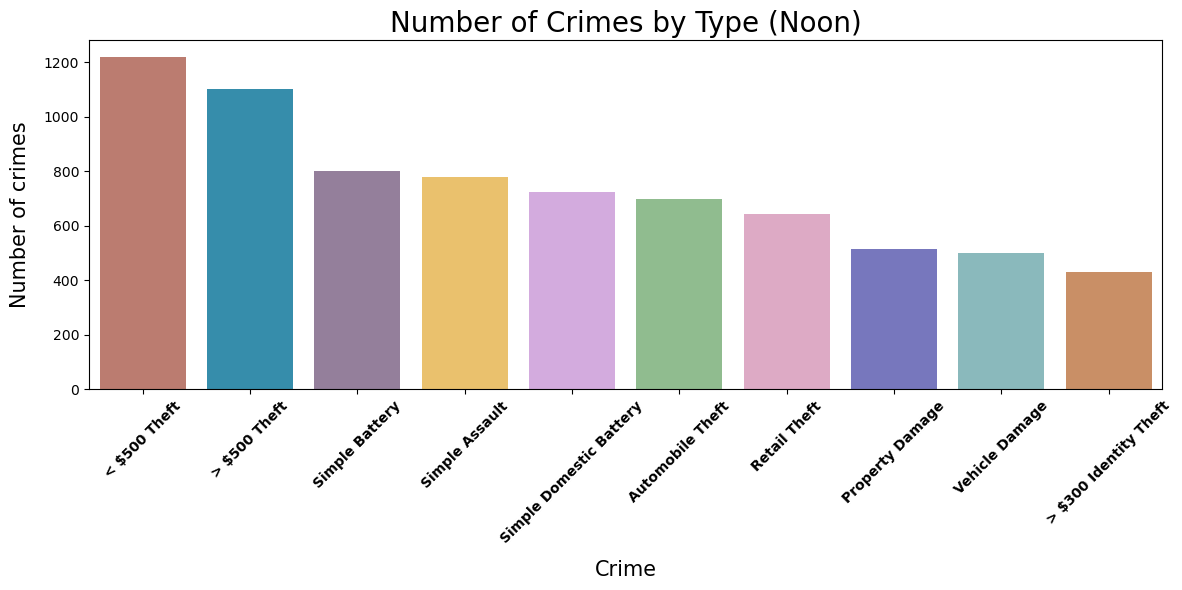

In [72]:
# Create a bar plot with the ordered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= combination_noon.Type, y = combination_noon.Count, palette = colors)
plt.xlabel('Crime', fontsize = 15, labelpad=10)
ax.set_xticklabels(labels = ['< $500 Theft', '> $500 Theft', 'Simple Battery', 'Simple Assault', 
                             'Simple Domestic Battery', 'Automobile Theft', 'Retail Theft', 'Property Damage', 
                             'Vehicle Damage', '> $300 Identity Theft'])
plt.ylabel('Number of crimes', fontsize = 15, labelpad=10)
plt.title('Number of Crimes by Type (Noon)', fontsize = 20)
plt.xticks(rotation=45, weight = 'bold')
plt.tight_layout()
plt.show()

### Noon Locations

In [73]:
noon_locations = noon['Location Description'].value_counts().head(10)
locations_noon = noon_locations.to_frame(name = 'Count').reset_index()
locations_noon

,index,Count
0,APARTMENT,2840
1,STREET,2729
2,RESIDENCE,2342
3,SIDEWALK,627
4,SMALL RETAIL STORE,576
5,PARKING LOT / GARAGE (NON RESIDENTIAL),488
6,COMMERCIAL / BUSINESS OFFICE,327
7,OTHER (SPECIFY),319
8,RESTAURANT,284
9,SCHOOL - PUBLIC BUILDING,246


In [74]:
#percent of top 10 crimes in public locations
(2729+627+576+488+284+246)*100/10778

45.92688810539989

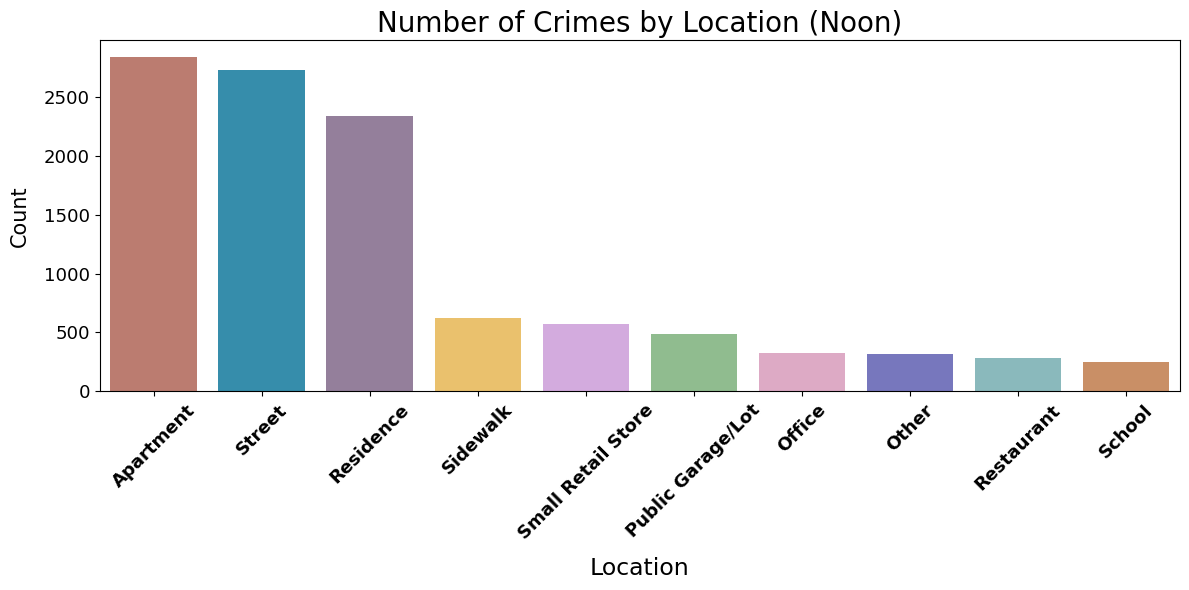

In [75]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= locations_noon.index, y = locations_noon.Count, palette = colors)
plt.xlabel('Location', fontsize = 17, labelpad=10)
ax.set_xticklabels(labels = ['Apartment', 'Street', 'Residence', 'Sidewalk', 
                            'Small Retail Store', 'Public Garage/Lot', 'Office', 'Other', 
                            'Restaurant', 'School'])
plt.ylabel('Count', fontsize = 15, labelpad=10)
plt.title('Number of Crimes by Location (Noon)', fontsize = 20)
plt.xticks(rotation=45, weight = 'bold', fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.show()

### Noon Violence

In [76]:
noon['Violent?'] = noon['IUCR'].apply(lambda x: is_violent(x))
noon.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time,Violent?
15,12885646,JF465749,2022-11-05 12:49:00,044XX W RICE ST,0620,BURGLARY,UNLAWFUL ENTRY,WAREHOUSE,True,False,...,05,1146532.0,1905297.0,2022,09/15/2023 03:41:25 PM,41.896112,-87.737267,"(41.896112422, -87.737267038)",12:00:00,False
27,12767058,JF324850,2022-07-03 12:00:00,019XX N LOWELL AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,02,1147084.0,1912456.0,2022,09/16/2023 03:41:56 PM,41.915747,-87.735056,"(41.915746919, -87.735056247)",12:00:00,False
41,13184937,JG393538,2022-08-01 12:00:00,020XX W HOMER ST,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,True,...,10,NaN,NaN,2022,08/23/2023 03:41:55 PM,NaN,NaN,NaN,12:00:00,False
55,12792072,JF354522,2022-08-12 12:00:00,032XX N DAMEN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,05,1162437.0,1921720.0,2022,09/20/2023 03:41:26 PM,41.940860,-87.678390,"(41.940860174, -87.678390398)",12:00:00,False
57,12616294,JF142268,2022-02-12 12:46:00,054XX S LOOMIS BLVD,031A,ROBBERY,ARMED - HANDGUN,STREET,True,False,...,03,1167920.0,1868745.0,2022,11/13/2023 03:41:12 PM,41.795376,-87.659766,"(41.795375753, -87.659766174)",12:00:00,True


In [77]:
violent_crimes_percentage = (noon['Violent?'].sum() / len(midnight)) * 100

print(f"The percentage of violent crimes is: {violent_crimes_percentage:.2f}%")

The percentage of violent crimes is: 12.60%


## Evening Rush Hour

In [78]:
evening_rush = crimes_cleaned.loc[(crimes_cleaned['Date'].dt.hour >= 16) & (crimes_cleaned['Date'].dt.hour < 19)]
evening_rush.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time
16,12893219,JF474959,2022-11-14 17:00:00,012XX S INDEPENDENCE BLVD,0325,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,...,29,03,1151289.0,1894080.0,2022,09/15/2023 03:41:25 PM,41.865240,-87.720090,"(41.865239745, -87.720089778)",17:00:00
17,13210651,JG424030,2022-12-29 17:00:00,026XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),False,False,...,30,17,1159021.0,1890619.0,2022,11/15/2023 03:41:31 PM,41.855587,-87.691800,"(41.855587334, -87.691800214)",17:00:00
19,12928785,JF517668,2022-12-20 16:30:00,076XX S MAPLEWOOD AVE,1020,ARSON,BY FIRE,RESIDENCE - GARAGE,True,False,...,70,09,1160707.0,1853794.0,2022,08/23/2023 03:40:54 PM,41.754500,-87.686629,"(41.754500145, -87.686628806)",16:00:00
22,12602374,JF125017,2022-01-26 17:45:00,069XX N CLARK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1,08B,1163566.0,1945922.0,2022,09/16/2023 03:41:56 PM,42.007248,-87.673556,"(42.007247653, -87.673555844)",17:00:00
29,12812832,JF378884,2022-06-23 17:35:00,026XX N MOODY AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,19,02,1134954.0,1916928.0,2022,09/16/2023 03:41:56 PM,41.928242,-87.779516,"(41.928242161, -87.779515528)",17:00:00


### Evening Rush Crime Types

In [79]:
combination_er = evening_rush.groupby(['Primary Type', 'Description']).size().reset_index(name='Count')
combination_er = combination_er.sort_values(by = 'Count', ascending = False).head(10)
combination_er['Type'] = combination_er['Primary Type'] + " " + combination_er['Description']
combination_er

,Primary Type,Description,Count,Type
237,THEFT,OVER $500,3287,THEFT OVER $500
232,THEFT,$500 AND UNDER,3178,THEFT $500 AND UNDER
115,MOTOR VEHICLE THEFT,AUTOMOBILE,2785,MOTOR VEHICLE THEFT AUTOMOBILE
37,BATTERY,DOMESTIC BATTERY SIMPLE,2563,BATTERY DOMESTIC BATTERY SIMPLE
17,ASSAULT,SIMPLE,2511,ASSAULT SIMPLE
40,BATTERY,SIMPLE,2328,BATTERY SIMPLE
53,CRIMINAL DAMAGE,TO VEHICLE,2240,CRIMINAL DAMAGE TO VEHICLE
240,THEFT,RETAIL THEFT,1995,THEFT RETAIL THEFT
51,CRIMINAL DAMAGE,TO PROPERTY,1680,CRIMINAL DAMAGE TO PROPERTY
235,THEFT,FROM BUILDING,871,THEFT FROM BUILDING


### Evening Rush Locations

In [80]:
er_locations = evening_rush['Location Description'].value_counts().head(10)
locations_er = er_locations.to_frame(name = 'Count').reset_index()
locations_er

,index,Count
0,STREET,10651
1,APARTMENT,6168
2,RESIDENCE,4289
3,SIDEWALK,1982
4,PARKING LOT / GARAGE (NON RESIDENTIAL),1717
5,SMALL RETAIL STORE,1679
6,RESTAURANT,993
7,DEPARTMENT STORE,856
8,ALLEY,759
9,OTHER (SPECIFY),555


### Evening Rush Violence

In [81]:
evening_rush['Violent?'] = evening_rush['IUCR'].apply(lambda x: is_violent(x))
evening_rush.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time,Violent?
16,12893219,JF474959,2022-11-14 17:00:00,012XX S INDEPENDENCE BLVD,0325,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,...,03,1151289.0,1894080.0,2022,09/15/2023 03:41:25 PM,41.865240,-87.720090,"(41.865239745, -87.720089778)",17:00:00,True
17,13210651,JG424030,2022-12-29 17:00:00,026XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),False,False,...,17,1159021.0,1890619.0,2022,11/15/2023 03:41:31 PM,41.855587,-87.691800,"(41.855587334, -87.691800214)",17:00:00,False
19,12928785,JF517668,2022-12-20 16:30:00,076XX S MAPLEWOOD AVE,1020,ARSON,BY FIRE,RESIDENCE - GARAGE,True,False,...,09,1160707.0,1853794.0,2022,08/23/2023 03:40:54 PM,41.754500,-87.686629,"(41.754500145, -87.686628806)",16:00:00,False
22,12602374,JF125017,2022-01-26 17:45:00,069XX N CLARK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,08B,1163566.0,1945922.0,2022,09/16/2023 03:41:56 PM,42.007248,-87.673556,"(42.007247653, -87.673555844)",17:00:00,True
29,12812832,JF378884,2022-06-23 17:35:00,026XX N MOODY AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,02,1134954.0,1916928.0,2022,09/16/2023 03:41:56 PM,41.928242,-87.779516,"(41.928242161, -87.779515528)",17:00:00,True


In [82]:
violent_crimes_percentage = (evening_rush['Violent?'].sum() / len(midnight)) * 100

print(f"The percentage of violent crimes is: {violent_crimes_percentage:.2f}%")

The percentage of violent crimes is: 42.93%


## Midnight

In [83]:
midnight = crimes_cleaned.loc[crimes_cleaned['Date'].dt.hour == 0]
midnight.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time
11,12735680,JF286563,2022-06-20 00:50:00,085XX S PEORIA ST,041A,BATTERY,AGGRAVATED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,71,04B,1171804.0,1848175.0,2022,09/15/2023 03:41:25 PM,41.738845,-87.646126,"(41.738844769, -87.646126146)",00:00:00
20,12713141,JF259485,2022-05-29 00:00:00,014XX S MUSEUM CAMPUS DR,0870,THEFT,POCKET-PICKING,SPORTS ARENA / STADIUM,False,False,...,33,06,NaN,NaN,2022,06/05/2022 03:40:47 PM,NaN,NaN,NaN,00:00:00
32,13211560,JG425458,2022-02-26 00:00:00,065XX N FRANCISCO AVE,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,...,2,10,NaN,NaN,2022,09/16/2023 03:42:58 PM,NaN,NaN,NaN,00:00:00
34,12826755,JF395464,2022-08-05 00:00:00,036XX W 58TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,62,17,1153103.0,1865576.0,2022,09/17/2023 03:41:45 PM,41.786985,-87.714185,"(41.786985284, -87.714184585)",00:00:00
35,13212633,JG426702,2022-11-26 00:00:00,052XX S KEDZIE AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,63,08A,1155933.0,1869765.0,2022,11/15/2023 03:41:31 PM,41.798424,-87.703696,"(41.798424102, -87.703695673)",00:00:00


In [84]:
combination_midnight = midnight.groupby(['Primary Type', 'Description']).size().reset_index(name='Count')
combination_midnight = combination_midnight.sort_values(by = 'Count', ascending = False).head(10)
combination_midnight['Type'] = combination_midnight['Primary Type'] + " " + combination_midnight['Description']
combination_midnight

,Primary Type,Description,Count,Type
210,THEFT,OVER $500,1738,THEFT OVER $500
205,THEFT,$500 AND UNDER,1564,THEFT $500 AND UNDER
33,BATTERY,DOMESTIC BATTERY SIMPLE,1503,BATTERY DOMESTIC BATTERY SIMPLE
48,CRIMINAL DAMAGE,TO VEHICLE,1323,CRIMINAL DAMAGE TO VEHICLE
108,MOTOR VEHICLE THEFT,AUTOMOBILE,1317,MOTOR VEHICLE THEFT AUTOMOBILE
46,CRIMINAL DAMAGE,TO PROPERTY,1104,CRIMINAL DAMAGE TO PROPERTY
35,BATTERY,SIMPLE,882,BATTERY SIMPLE
15,ASSAULT,SIMPLE,732,ASSAULT SIMPLE
74,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,708,DECEPTIVE PRACTICE FINANCIAL IDENTITY THEFT OV...
75,DECEPTIVE PRACTICE,FORGERY,466,DECEPTIVE PRACTICE FORGERY


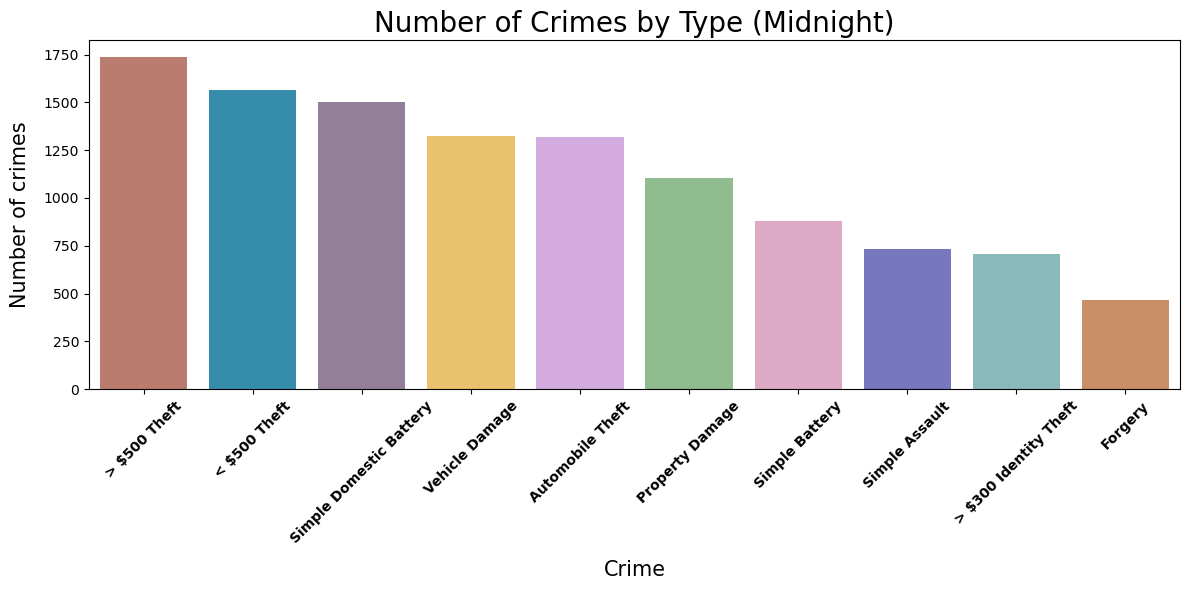

In [85]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= combination_midnight.Type, y = combination_midnight.Count, palette = colors)
plt.xlabel('Crime', fontsize = 15, labelpad=10)
ax.set_xticklabels(labels = ['> $500 Theft', '< $500 Theft', 'Simple Domestic Battery', 'Vehicle Damage', 
                             'Automobile Theft', 'Property Damage', 'Simple Battery', 'Simple Assault', 
                             '> $300 Identity Theft', 'Forgery'])
plt.ylabel('Number of crimes', fontsize = 15, labelpad=10)
plt.title('Number of Crimes by Type (Midnight)', fontsize = 20)
plt.xticks(rotation=45, weight = 'bold')
#plt.xticks(x, weight = 'bold')

plt.tight_layout()
plt.show()

### Midnight Locations

In [86]:
midnight_locations = midnight['Location Description'].value_counts().head(10)
locations_midnight = midnight_locations.to_frame(name = 'Count').reset_index()
locations_midnight

,index,Count
0,STREET,5613
1,APARTMENT,4658
2,RESIDENCE,3744
3,SIDEWALK,794
4,PARKING LOT / GARAGE (NON RESIDENTIAL),615
5,OTHER (SPECIFY),432
6,ALLEY,404
7,COMMERCIAL / BUSINESS OFFICE,404
8,SMALL RETAIL STORE,302
9,RESTAURANT,269


In [87]:
#Percentage of top 10 crimes in public locations
(5613+794+615+404+302+269)*100/17235

46.399767914128226

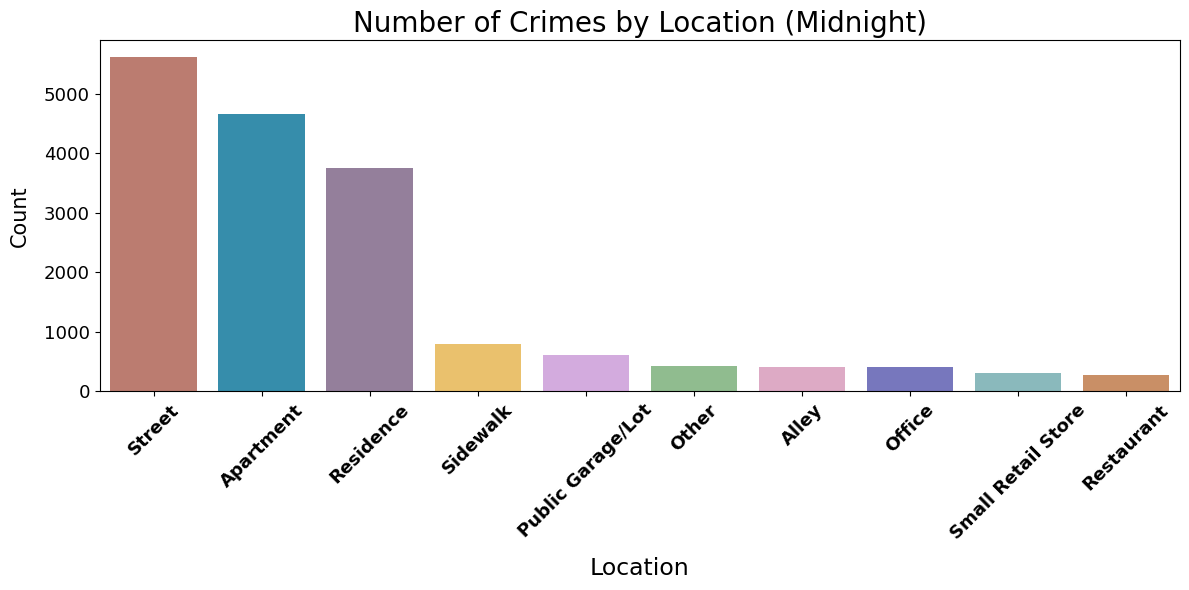

In [88]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= locations_midnight.index, y = locations_midnight.Count, palette = colors)
#ax = sns.barplot(x= locations_midnight.Count, y = locations_midnight.index, palette = colors, orient = "h")

plt.xlabel('Location', fontsize = 17, labelpad=10)
ax.set_xticklabels(labels = ['Street', 'Apartment', 'Residence', 'Sidewalk', 
                            'Public Garage/Lot', 'Other', 'Alley', 'Office', 
                            'Small Retail Store', 'Restaurant'])
plt.ylabel('Count', fontsize = 15, labelpad=10)
plt.title('Number of Crimes by Location (Midnight)', fontsize = 20)
plt.xticks(rotation=45, weight = "bold", fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.show()

### Midnight Violence

In [89]:
midnight['Violent?'] = midnight['IUCR'].apply(lambda x: is_violent(x))
midnight.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hourly_time,Violent?
11,12735680,JF286563,2022-06-20 00:50:00,085XX S PEORIA ST,041A,BATTERY,AGGRAVATED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,04B,1171804.0,1848175.0,2022,09/15/2023 03:41:25 PM,41.738845,-87.646126,"(41.738844769, -87.646126146)",00:00:00,True
20,12713141,JF259485,2022-05-29 00:00:00,014XX S MUSEUM CAMPUS DR,0870,THEFT,POCKET-PICKING,SPORTS ARENA / STADIUM,False,False,...,06,NaN,NaN,2022,06/05/2022 03:40:47 PM,NaN,NaN,NaN,00:00:00,False
32,13211560,JG425458,2022-02-26 00:00:00,065XX N FRANCISCO AVE,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,...,10,NaN,NaN,2022,09/16/2023 03:42:58 PM,NaN,NaN,NaN,00:00:00,False
34,12826755,JF395464,2022-08-05 00:00:00,036XX W 58TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,17,1153103.0,1865576.0,2022,09/17/2023 03:41:45 PM,41.786985,-87.714185,"(41.786985284, -87.714184585)",00:00:00,False
35,13212633,JG426702,2022-11-26 00:00:00,052XX S KEDZIE AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,08A,1155933.0,1869765.0,2022,11/15/2023 03:41:31 PM,41.798424,-87.703696,"(41.798424102, -87.703695673)",00:00:00,False


In [90]:
# Calculate the percentage of rows where crime is considered violent
violent_crimes_percentage = (midnight['Violent?'].sum() / len(midnight)) * 100

print(f"The percentage of violent crimes is: {violent_crimes_percentage:.2f}%")


The percentage of violent crimes is: 21.88%


#### IMPORTANT NOTES
mention that cta stations are not in any of the top 10s for any of the time frames despite rush hour having heavy cta traffic. notable for both stakeholder parties. 

*retail theft is actually more common during the day time compared to night-time break-ins. relevant for business owners*

*talk about violent crime rates*

## Other sections

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.